# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

## Macierz kowariancji

  $$ C_{ij} = \frac{1}{N-1}\sum_{k=1}^N{ X_{ki} X_{kj}}$$

Mamy zestaw danych będący 40 punktami na płaszczyźnie $(x_i,y_i).$

In [2]:
X = np.empty((40,2))
X[:,0] = np.linspace(-1,1,40)+ np.random.randn(40)*0.1
X[:,1] = 1.1*X[:,0] + np.random.randn(40)*0.2
print(X)

[[-0.83114374 -0.55277754]
 [-0.92411708 -0.68634061]
 [-0.73171223 -0.56312117]
 [-0.78562448 -0.90202977]
 [-0.73948445 -0.95573919]
 [-0.79261952 -1.05702312]
 [-0.70415409 -0.60676801]
 [-0.67630104 -0.63265276]
 [-0.55998692 -0.49209348]
 [-0.4832031  -0.01701689]
 [-0.42341515 -0.16436894]
 [-0.50196159 -0.63657492]
 [-0.29347165 -0.2596135 ]
 [-0.35590706 -0.53098275]
 [-0.2898441  -0.43800886]
 [-0.38258608 -0.6934978 ]
 [-0.18110713 -0.20215888]
 [-0.17050006 -0.01402835]
 [-0.23077825 -0.20050457]
 [ 0.15277997  0.00903082]
 [-0.05202033  0.29439824]
 [ 0.04646158  0.20427757]
 [ 0.19520162  0.12782981]
 [ 0.30590569  0.39153147]
 [ 0.36601528  0.09596971]
 [ 0.23684966  0.21669249]
 [ 0.26794592  0.33802136]
 [ 0.37442171  0.49692053]
 [ 0.36663359  0.25581072]
 [ 0.45848846  0.42957492]
 [ 0.55307678  0.59908392]
 [ 0.51925803  0.49249972]
 [ 0.52602364  0.89711029]
 [ 0.60421752  0.41844947]
 [ 0.79109806  0.8607564 ]
 [ 0.91829108  1.01280798]
 [ 1.03112452  1.24133554]
 

<IPython.core.display.Javascript object>


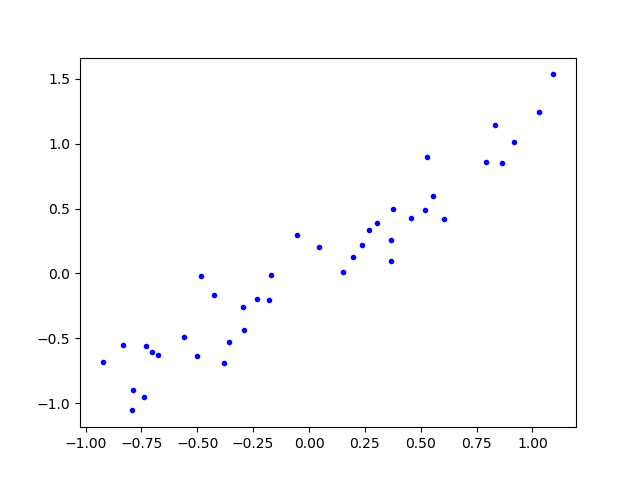

In [3]:
plt.plot(X[:,0], X[:,1], 'b.')

###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.cov`.

In [4]:
C = np.cov(X[:,0], X[:,1])
C

array([[0.35015947, 0.36871551],
       [0.36871551, 0.42587125]])

In [5]:
assert C.shape == (2,2)


###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.mean` `np.sum`

In [6]:
#Wikipedia
def kowariancja(X):
    N = X.shape[1]
    C = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j:                             #VARIANCE
                E_X2 = np.mean((X[:,i])**2)
                EX2 = np.mean(X[:,j])**2
                C[i,j] = E_X2 - EX2
            else:                                  #COVARIANCE
                C[i,j] = np.mean(X[:,j]*X[:,i]) - (np.mean(X[:,j]) * np.mean(X[:,i]))
    return C

print(kowariancja(X))

[[0.34140548 0.35949763]
 [0.35949763 0.41522447]]


In [11]:
#Wzór z początku notatnika
def kowariancja(X):
    N = X.shape[1]
    C = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            C[i,j] = (1/(X.shape[0]-1))*np.sum((X[:,i] - np.mean(X[:,i]))*(X[:,j] - np.mean(X[:,j])))
    return C
print(kowariancja(X))

[[0.35015947 0.36871551]
 [0.36871551 0.42587125]]


In [12]:
from sklearn.decomposition import PCA

pca_ = PCA()
pca_.fit(X)

print(pca_.get_covariance())
print(np.cov(X.T))

[[0.35015947 0.36871551]
 [0.36871551 0.42587125]]
[[0.35015947 0.36871551]
 [0.36871551 0.42587125]]


In [13]:
np.testing.assert_almost_equal(kowariancja(X), np.cov(X.T))

import inspect
blacklist = ["cov","corrcoef"]
assert all([ not keyword  in inspect.getsource(kowariancja) for keyword in blacklist])


### Wartości i wektory własne

Narysujmy dane


<IPython.core.display.Javascript object>


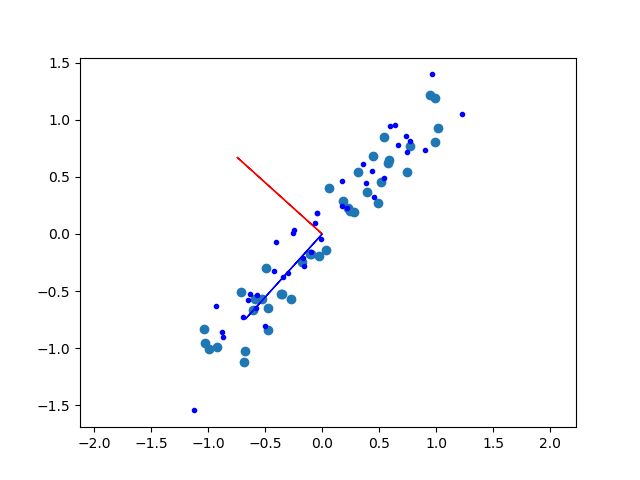

In [20]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

### Zagadnienie własne

Szukamy takich liczb $\lambda_i$ i wektorów $x_i$ by zachodziło:
$$ C x_i = \lambda_i x_i $$


W numpy mamy gotową funkcję obliczającą liczby $\lambda_i$ i wektory $x_i$:

In [21]:
val, ev =  np.linalg.eig(C)


In [22]:
val, ev

(array([0.01568462, 0.81803319]), array([[-0.74258775, -0.66974879],
        [ 0.66974879, -0.74258775]]))


### Sprawdźmy rachunkiem równanie własne:

Niech `lam` będzie wartością własną a `vec` wektorem:

In [36]:
lam = val[0]
vec = ev[:,0]

To zachodzi:
    
`np.dot(C,vec) == lam*vec`

In [37]:
np.testing.assert_allclose(np.dot(C,vec), lam*vec)
assert abs(lam)>1e-6

Dodajmy na rysunku wektory własne:

In [25]:
plt.arrow(0,0,ev[0,0],ev[1,0],color='r')
plt.arrow(0,0,ev[0,1],ev[1,1],color='b')

Sprawdźmy jeszcze,  że wektory własne odpowiadające różnym wartościom własnym są orgotonalne.
    
    

In [26]:
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,0]), 1)
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,1]), 0)

## PCA

Wykonamy redukcję PCA 13 wymiarowego  zestawu do przestrzeni 3d


Referencyjną implementacją będzie `sklearn.decomposition.PCA`.

Niech:

  - `Xorig`  - dane orginalne (przed PCA)
  - `X` - dane w zredukowanej przestrzeni

Zaimplementujemy taką samą operację konstruując operator rzutowania z 13 do 3 wymiarów z trzech wektorów własnych macierzy kowariancji. Wektory wybierzemy kierując się tym by odpowiadały one największym wartościom własnym.



In [15]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X,y  = datasets.load_wine(return_X_y=True)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X)

Xorig = X.copy()
X = pca.transform(X)

In [16]:
Xorig.shape,"->", X.shape

((178, 13), '->', (178, 3))

In [17]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

### Krok 1: oblicz macierz kowariancji

In [45]:
C = kowariancja(Xorig)

In [46]:
np.testing.assert_approx_equal(C[11,2],0.0039333279)
np.testing.assert_almost_equal(C,np.cov(Xorig.T))

### Krok 2:  Wektory i wartości własne macierzy kowariancji. 

Rozwiązujemy numerycznie zagadnienie własne macierzy $C$:

In [83]:
val, ev =  np.linalg.eig(C)

**Posortuj** wartości i odpowiadające im wektory własne od największej do najmniejszej wartości własnej.

*warto rozważyć zastosowanie* `np.argsort`.

In [84]:
val = np.sort(val)[::-1]
print(val)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [89]:
sorted_ev = ev[np.argsort(val)[::-1]]

sorted_ev

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

Pierwsze trzy wartości własne powinny być takie same jak liczby w atrybucie `pca.explained_variance_`

In [90]:
np.testing.assert_allclose(val[-1],0.1039619918207, rtol=1e-5)
np.testing.assert_allclose(pca.explained_variance_, val[:3], rtol=1e-5)

### Krok 3: Stwórz macierz operatora rzutowania z przestrzeni 13d w  3d

Mając jeden znormalizowany wektor własny (13 liczb), iloczyn skalarny tego wektora przez dowolny inny wektor tej samej przestrzeni (13d) można zinterpretować jako rzutowanie. Chcemy rzutować na pierwsze trzy wektory własne - można więc przedstawić to jako operację liniową z macierzą $(13,3)$


Macierz taka składa się z trzech 13 elementowych kolumn, będących wartościami własnymi macierzy kowariancji.

In [92]:
P = sorted_ev[:,:3]
P

array([[-0.1443294 ,  0.48365155, -0.20738262],
       [ 0.24518758,  0.22493093,  0.08901289],
       [ 0.00205106,  0.31606881,  0.6262239 ],
       [ 0.23932041, -0.0105905 ,  0.61208035],
       [-0.14199204,  0.299634  ,  0.13075693],
       [-0.39466085,  0.06503951,  0.14617896],
       [-0.4229343 , -0.00335981,  0.1506819 ],
       [ 0.2985331 ,  0.02877949,  0.17036816],
       [-0.31342949,  0.03930172,  0.14945431],
       [ 0.0886167 ,  0.52999567, -0.13730621],
       [-0.29671456, -0.27923515,  0.08522192],
       [-0.37616741, -0.16449619,  0.16600459],
       [-0.28675223,  0.36490283, -0.12674592]])

In [93]:
P.shape

(13, 3)

W sklearn mamy taką macierz w atrybucie `pca.components_`:

In [94]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

Sprawdźmy czy otrzymamy te same wyniki:

In [95]:
np.testing.assert_almost_equal(np.abs(P.T),np.abs(pca.components_))

### Krok 4: Wykonaj rzutowanie wszytkich  danych z 13d do 3d.

Najpierw dla sprawdzenia wykonamy rzutowanie jeden punkt z 13d do 3d (np. z indeksem  12)

In [96]:
print(Xorig[12])

[ 0.92568536 -0.54429654  0.15894572 -1.04947918 -0.75420173  0.48853108
  0.73362894 -0.57898505  0.3838836   0.23441405  0.84478453  0.40722789
  1.82505483]


In [97]:
x12 = np.dot(Xorig[12], P)

In [98]:
print(x12)

[-2.11346234  0.67570634 -0.86508643]


In [99]:
x12.shape = (3,)
np.testing.assert_almost_equal(x12, [-2.11346234,  0.67570634, -0.86508643])

Możemy teraz wykonać rzutowanie dla wszystkich danych. 

In [100]:
X_3d= Xorig.dot(P)

In [101]:
# X_3d

In [102]:
X_3d.shape  == (Xorig.shape[0],3)

np.testing.assert_allclose(X_3d[:4],np.array([[-3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [-2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [-2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [-3.75706561e+00,  2.75637191e+00, -1.76191842e-01]]), rtol=1e-5 )

Ostatecznie wektor w zredukowanej przestrzeni obliczony przez nas i wektor obliczony przez sklear są takie same.

In [103]:
np.testing.assert_allclose(np.abs(X_3d),np.abs(X), rtol=1e-5)